In [29]:
%matplotlib inline
import numpy as np
import gc

# 2

Fortunately, it turns out the convergent profiles can actually be integrated analytically, with a small simplifying assumption.

Suppose all the galaxies we're concerned with are approximately circular. Then the measure of integration for the intensity profile is just the differential area of a circular annulus $\pi(r + dr)^2 - \pi r^2 = 2\pi r dr + O(dr^2)$

We have

$$ \begin{align} 
    L_{deVaucouleur} &= 2\pi \int_0^\infty  e^{-(r/R)^{1/4}}rdr \\[12pt]
        &= 40320 \pi R^{2}
\end{align}$$

Proof is a straightforward (but incredibly long) exercise in iterative integration by parts that I left to Mathematica, but this does demonstrate convergence. We'll have to get $r_{1/2}$ numerically though, because even though Mathematica does give a formula for $L(r)$, it's too horrifying to be useful, and excruciating to typeset.



In [25]:
R = 1 # Mpc
L_tot = np.pi * 40320 * R*R
r = np.linspace(0,1e5,1e7)
dr = r[1]-r[0]
L = (2*np.pi)*np.cumsum(np.exp(-((r/R)**0.25))*r*dr)

for i,f in enumerate(L/L_tot):
    if 0.49 < f < 0.51:
        print r[i]
        break

del L
objcount = gc.collect()

Using matplotlib backend: Qt4Agg
3336.72033367



The spiral case is simpler however.

$$ \begin{align} 
    \int_0^r I_{spiral} dA &= 2\pi \int_0^r  e^{-(r/R)}rdr \\[12pt]
        &= 2 \pi R\left(R-e^{-r/R}(R+r)\right) \\[12pt]
        &\implies L_{spiral} = 2\pi R^2
\end{align}$$

So we find $r_{1/2}$ by requiring

$$
2 \pi R\left(R-e^{-r_{1/2}/R}(R+r_{1/2})\right) - \pi R^2 = 0
$$

which is easy to do graphically.

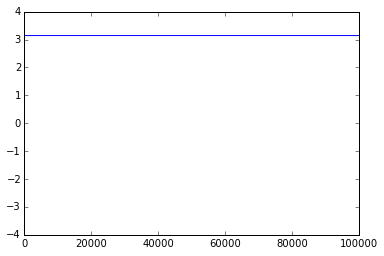

In [30]:
f = 2* np.pi * (R - np.exp(-r/R)*(R+r)) - np.pi*R**2
plot(r,f)
